#📌 Extracción

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
ruta1=r'C:\Users\Luis Mendoza\Desktop/cursos/challengerTelecom/TelecomX_Data.json'

In [5]:
df = pd.read_json(ruta1)

In [6]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [8]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_final = pd.concat([
    df[['customerID', 'Churn']].reset_index(drop=True),
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [11]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [31]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [13]:
for col in df_final.columns:
    print(f"Columna: {col}")
    print(df_final[col].unique())
    print("-" * 30)
     

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['No' 'Yes' '']
------------------------------
Columna: gender
['Female' 'Male']
------------------------------
Columna: SeniorCitizen
[0 1]
------------------------------
Columna: Partner
['Yes' 'No']
------------------------------
Columna: Dependents
['Yes' 'No']
------------------------------
Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Columna: PhoneService
['Yes' 'No']
------------------------------
Columna: MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Columna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Columna: OnlineSecurity
['No' 'Yes' 'No intern

In [18]:
print("Valores nulos por columna:")
print(df_final.isnull().sum())

print("\nPorcentaje de valores nulos:")
print((df_final.isnull().mean() * 100).round(2))

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Porcentaje de valores nulos:
customerID          0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Charges.Mont

In [21]:
duplicados = df_final.duplicated()
print(f" Filas duplicadas: {duplicados.sum()}")

# Para verlas:
df_final[duplicados]

 Filas duplicadas: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [26]:
#Eliminar espacios en blanco y reemplazar por '0'
df_final['Charges.Total'] = df_final['Charges.Total'].astype(str).str.strip().replace('', '0')

# 2. Convertir a tipo numérico (float)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')


print(df_final['Charges.Total'].dtypes)


float64


In [27]:
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)


In [59]:
print("Tipos de datos:")
print(df_final.dtypes)

#revisamos el tipo de cada columna
print("\n📌 Valores únicos por columna (para detectar errores de categorías):")
for col in df_final.columns:
    print(f"{col}: {df_final[col].nunique()} únicos")

Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Cuentas_Diarias     float64
dtype: object

📌 Valores únicos por columna (para detectar errores de categorías):
customerID: 7267 únicos
Churn: 3 únicos
gender: 2 únicos
SeniorCitizen: 2 únicos
Partner: 2 únicos
Dependents: 2 únicos
tenure: 73 únicos
PhoneService: 2 únicos
MultipleLines: 3 únicos
InternetService: 3 únicos
OnlineSecurity: 3 únicos
OnlineBackup: 3 únicos
DeviceProtection: 3 únicos

In [60]:
# ver si no hay duplicados
cat_cols = df_final.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"Categorías en '{col}':")
    print(df_final[col].value_counts(dropna=False))
    print("-" * 40)

Categorías en 'customerID':
customerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64
----------------------------------------
Categorías en 'Churn':
Churn
No              5174
Yes             1869
Sin registro     224
Name: count, dtype: int64
----------------------------------------
Categorías en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64
----------------------------------------
Categorías en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64
----------------------------------------
Categorías en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
----------------------------------------
Categorías en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
----------------------------------------
Categorías en 'MultipleLines'

In [35]:
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [61]:
# Crear columna con estimado de facturación diaria
df_final['Cuentas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)


df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [38]:

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [39]:

# Análisis descriptivo de columnas numéricas
descripcion = df_final.describe().T  # Transpuesta para mejor lectura
print(descripcion)


                  count         mean          std    min      25%      50%  \
SeniorCitizen    7267.0     0.162653     0.369074   0.00    0.000     0.00   
tenure           7267.0    32.346498    24.571773   0.00    9.000    29.00   
Charges.Monthly  7267.0    64.720098    30.129572  18.25   35.425    70.30   
Charges.Total    7267.0  2277.182035  2268.648587   0.00  396.200  1389.20   
Cuentas_Diarias  7267.0     2.157292     1.004407   0.61    1.180     2.34   

                      75%      max  
SeniorCitizen       0.000     1.00  
tenure             55.000    72.00  
Charges.Monthly    89.875   118.75  
Charges.Total    3778.525  8684.80  
Cuentas_Diarias     2.995     3.96  


In [45]:
df_final['Churn'].head(100)

0      No
1      No
2     Yes
3     Yes
4     Yes
     ... 
95    Yes
96       
97    Yes
98       
99     No
Name: Churn, Length: 100, dtype: object

In [46]:
# Eliminar espacios y reemplazar nulos o vacíos por "Sin registro"
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().replace({'': 'Sin registro', 'nan': 'Sin registro'})


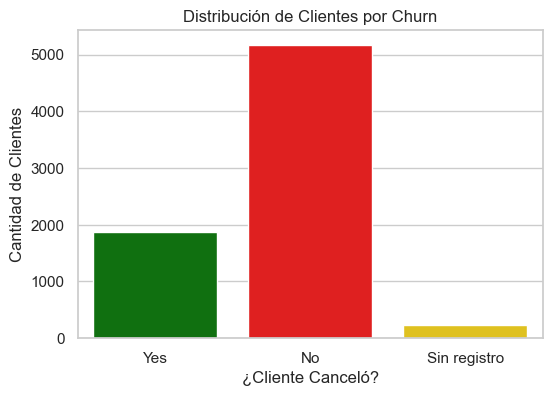

In [52]:
# Definir orden y colores personalizados
orden = ['Yes', 'No', 'Sin registro']
colores = ['green', 'red', 'gold']

plt.figure(figsize=(6,4))
sns.countplot(
    data=df_final,
    x='Churn',
    hue='Churn',
    order=orden,
    palette=dict(zip(orden, colores)),
    legend=False
)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('¿Cliente Canceló?')
plt.ylabel('Cantidad de Clientes')
plt.show()


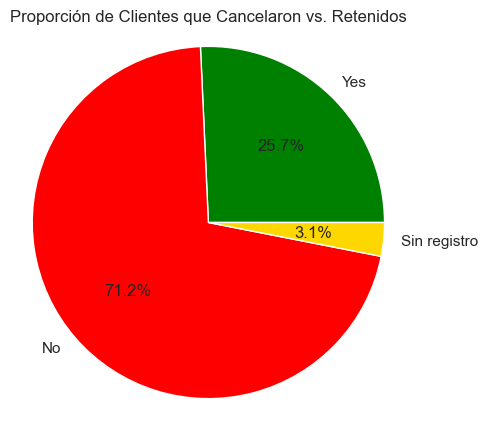

In [48]:
#otra grafica
churn_counts = df_final['Churn'].value_counts()


churn_counts = churn_counts.reindex(orden)


plt.figure(figsize=(5,5))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    colors=[dict(zip(orden, colores))[k] for k in churn_counts.index]
)
plt.title('Proporción de Clientes que Cancelaron vs. Retenidos')
plt.axis('equal')
plt.show()


In [49]:
conteo_churn = df_final['Churn'].value_counts()

# ver todos los valores de cchurn
print("Conteo de valores en la columna 'Churn':")
print(conteo_churn)

Conteo de valores en la columna 'Churn':
Churn
No              5174
Yes             1869
Sin registro     224
Name: count, dtype: int64


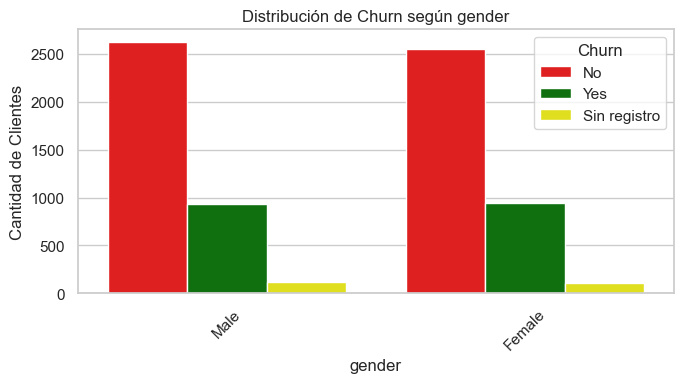

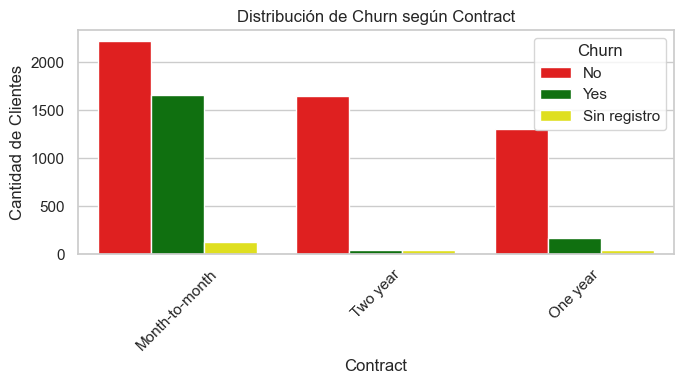

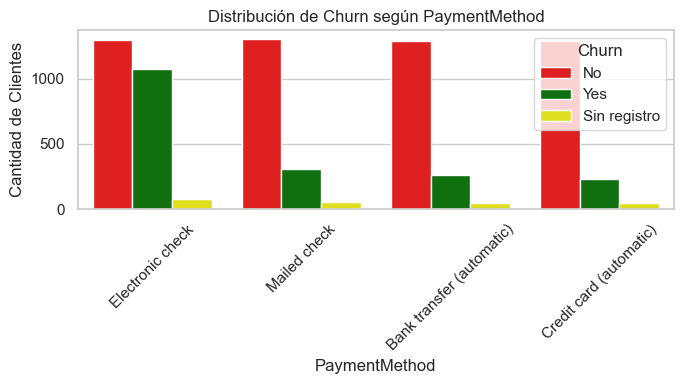

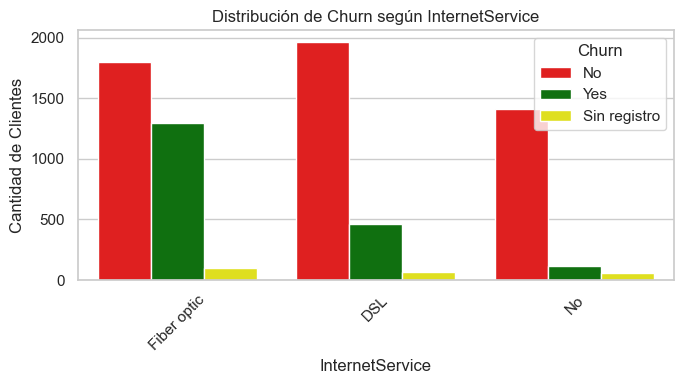

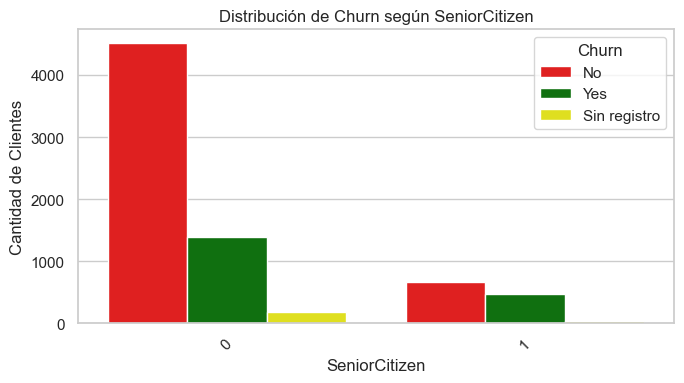

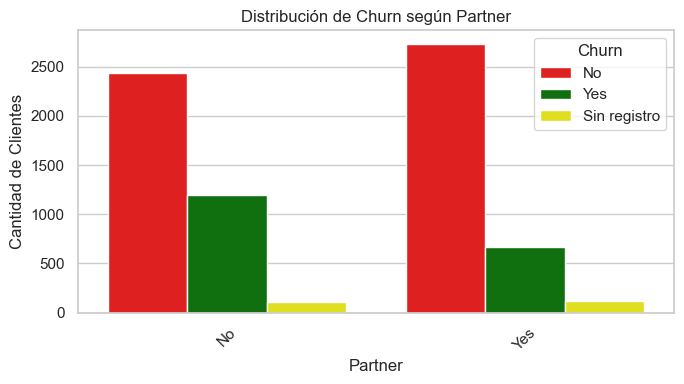

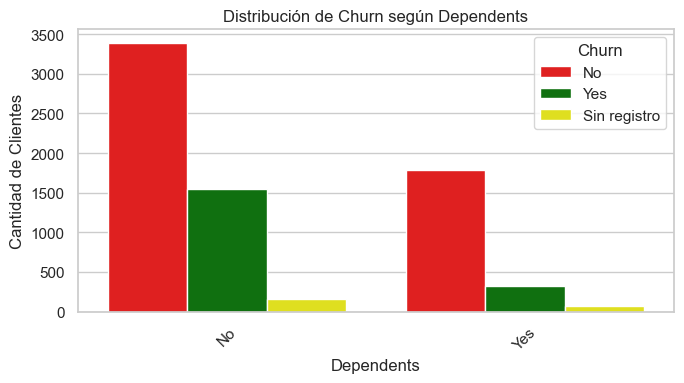

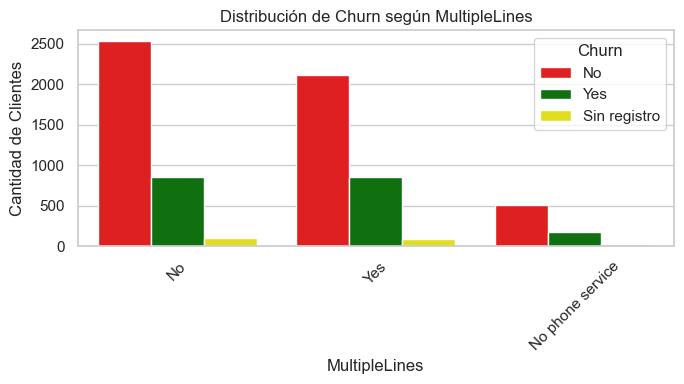

In [53]:
# Variables categóricas a analizar
cat_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 
            'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines']

df_final['Churn'] = df_final['Churn'].replace('', 'Sin registro').fillna('Sin registro')


colores = {'Yes': 'green', 'No': 'red', 'Sin registro': 'yellow'}

# Graficar cada variable categórica vs Churn
for var in cat_vars:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df_final, x=var, hue='Churn',
                  palette=colores,
                  order=df_final[var].value_counts().index)  # Ordenamos por frecuencia

    plt.title(f'Distribución de Churn según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\Luis Mendoza\AppData\Local\Temp\ipykernel_9768\3778755136.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=colores)


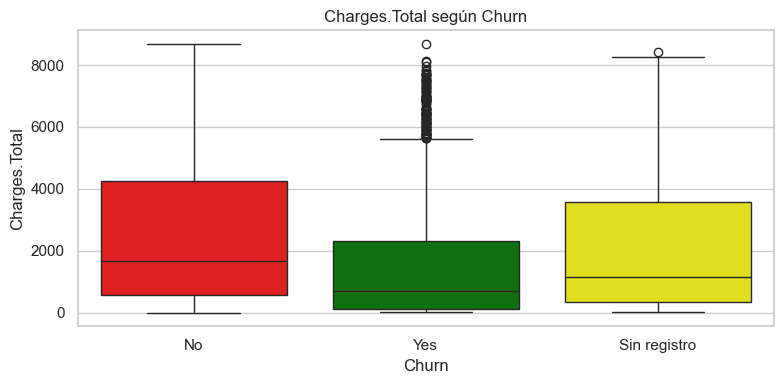

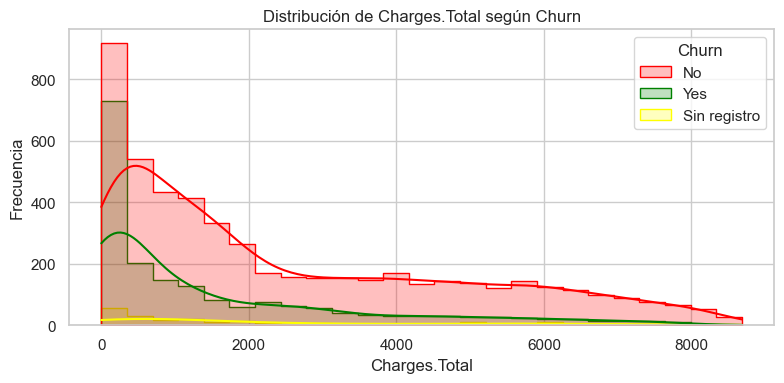

C:\Users\Luis Mendoza\AppData\Local\Temp\ipykernel_9768\3778755136.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=colores)


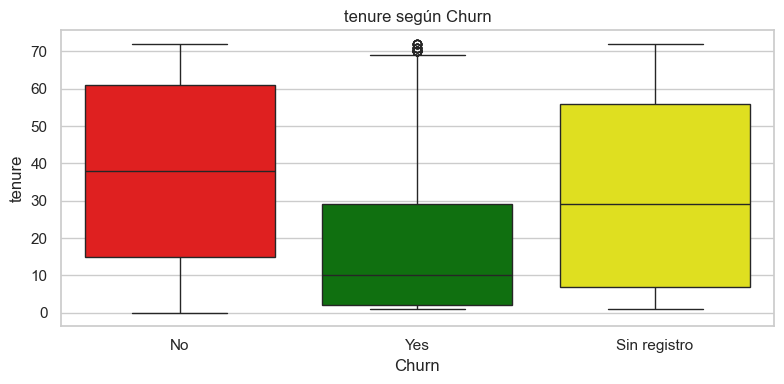

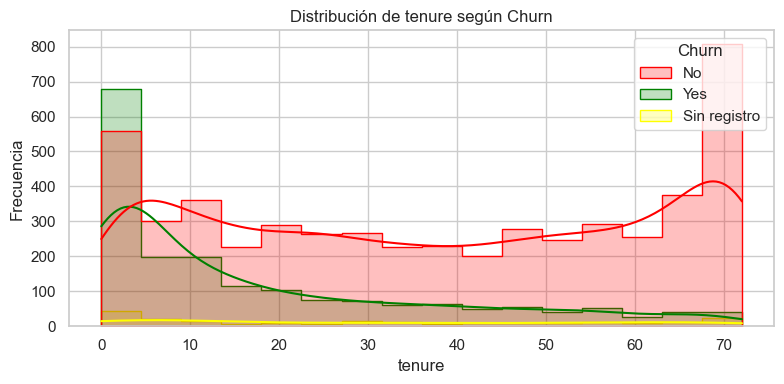

C:\Users\Luis Mendoza\AppData\Local\Temp\ipykernel_9768\3778755136.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=colores)


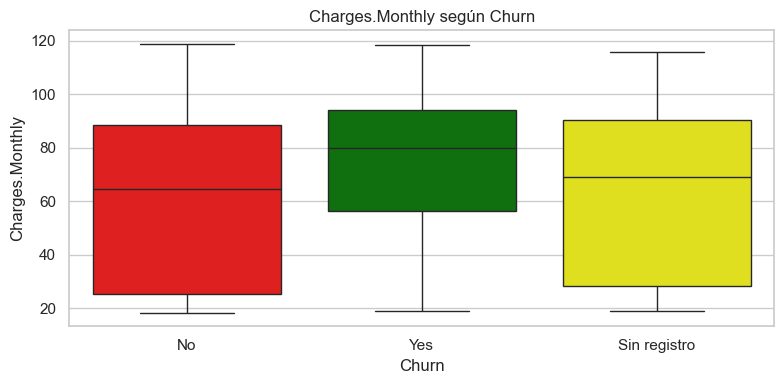

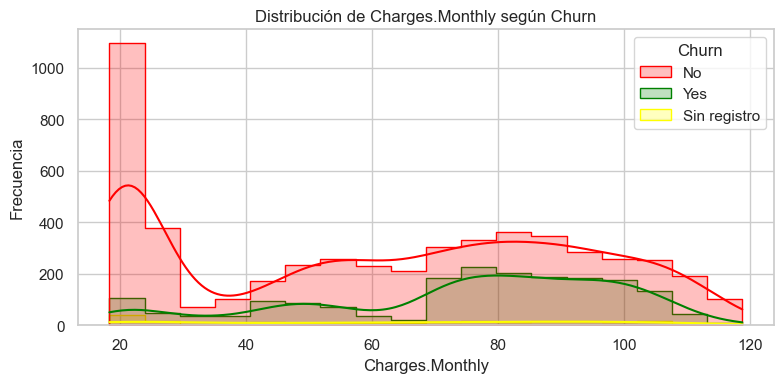

In [64]:


# Definimos variables numéricas a analizar
num_vars = ['Charges.Total', 'tenure', 'Charges.Monthly']

# Creamos gráficos tipo boxplot y distribuciones
for var in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_final, x='Churn', y=var, palette=colores)
    plt.title(f'{var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

    # Distribución
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_final, x=var, hue='Churn', kde=True, palette=colores, element='step')
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

In [55]:
# Asegurar conversión a numérico (por si acaso)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Definir variables numéricas
numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Agrupar por Churn y describir
resumen_churn = df_final.groupby('Churn')[numericas].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)

# Mostrar tabla
print(resumen_churn)


             tenure                              Charges.Monthly         \
              count   mean median    std min max           count   mean   
Churn                                                                     
No             5174  37.57   38.0  24.11   0  72            5174  61.27   
Sin registro    224  31.57   29.0  25.00   1  72             224  63.41   
Yes            1869  17.98   10.0  19.53   1  72            1869  74.44   

                                          Charges.Total                    \
             median    std    min     max         count     mean   median   
Churn                                                                       
No            64.43  31.09  18.25  118.75          5174  2549.91  1679.52   
Sin registro  69.10  31.39  18.75  115.55           224  2196.93  1163.18   
Yes           79.65  24.67  18.85  118.35          1869  1531.80   703.55   

                                       
                  std    min      max  
Churn 

#📄Informe final